In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.special import erfc

Define a datamodel

In [69]:
d = 1000

In [70]:
x_diagonal = KFeaturesDefinition(diagonal=[(0.5,d)])
θ_diagonal = KFeaturesDefinition(diagonal=[(2,d)])
ω_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
δ_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
ν_diagonal = KFeaturesDefinition(diagonal=[(1,d)])

low_low_kwargs = {
    "x_diagonal": x_diagonal,
    "θ_diagonal": θ_diagonal,
    "ω_diagonal": ω_diagonal,
    "δ_diagonal": δ_diagonal,
    "ν_diagonal": ν_diagonal,
}

low_robustness_low_usefulness = DataModel(
    d,
    normalize_matrices=False,
    data_model_factory=k_features_factory,
    factory_kwargs=low_low_kwargs,
    name="low_robustness_low_usefulness"
)


In [71]:
x_diagonal = KFeaturesDefinition(diagonal=[(0.5,d)])
θ_diagonal = KFeaturesDefinition(diagonal=[(8,d)])
ω_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
δ_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
ν_diagonal = KFeaturesDefinition(diagonal=[(1,d)])

low_high_kwargs = {
    "x_diagonal": x_diagonal,
    "θ_diagonal": θ_diagonal,
    "ω_diagonal": ω_diagonal,
    "δ_diagonal": δ_diagonal,
    "ν_diagonal": ν_diagonal,
}

low_robustness_high_usefulness = DataModel(
    d,
    normalize_matrices=False,
    data_model_factory=k_features_factory,
    factory_kwargs=low_high_kwargs,
    name="low_robustness_high_usefulness"
)


In [72]:
x_diagonal = KFeaturesDefinition(diagonal=[(2,d)])
θ_diagonal = KFeaturesDefinition(diagonal=[(0.5,d)])
ω_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
δ_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
ν_diagonal = KFeaturesDefinition(diagonal=[(1,d)])

high_low_kwargs = {
    "x_diagonal": x_diagonal,
    "θ_diagonal": θ_diagonal,
    "ω_diagonal": ω_diagonal,
    "δ_diagonal": δ_diagonal,
    "ν_diagonal": ν_diagonal,
}

high_robustness_low_usefulness = DataModel(
    d,
    normalize_matrices=False,
    data_model_factory=k_features_factory,
    factory_kwargs=high_low_kwargs,
    name="high_robustness_low_usefulness"
)


In [73]:
x_diagonal = KFeaturesDefinition(diagonal=[(2,d)])
θ_diagonal = KFeaturesDefinition(diagonal=[(2,d)])
ω_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
δ_diagonal = KFeaturesDefinition(diagonal=[(1,d)])
ν_diagonal = KFeaturesDefinition(diagonal=[(1,d)])

high_high_kwargs = {
    "x_diagonal": x_diagonal,
    "θ_diagonal": θ_diagonal,
    "ω_diagonal": ω_diagonal,
    "δ_diagonal": δ_diagonal,
    "ν_diagonal": ν_diagonal,
}

high_robustness_high_usefulness = DataModel(
    d,
    normalize_matrices=False,
    data_model_factory=k_features_factory,
    factory_kwargs=high_high_kwargs,
    name="high_robustness_high_usefulness"
)


Define an experiment

In [74]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=1,
    alphas=np.logspace(-0.2,2,10),
    epsilons=np.array([0.0, 0.1, 0.2, 0.3]),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models = [low_robustness_low_usefulness, low_robustness_high_usefulness, high_robustness_low_usefulness, high_robustness_high_usefulness],
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.Logistic,
    gamma_fair_error=0.01,
    name="feature_combinations"
)
experiment_json = experiment.to_json()

In [75]:
with open("feature_combinations.json", "w") as f:
    f.write(experiment_json)

In [76]:
# venv_python = ".venv/bin/python"
# command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
# subprocess.run(command)

In [234]:
subprocess.run("pwd")

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS


CompletedProcess(args='pwd', returncode=0)

In [196]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:40: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df = df.rename({"epsilon_g_0":"epsilon_g"})


In [198]:
df

alpha,epsilon,tau,lam,epsilon_g,data_model_name,id,date,task_type,erm_problem_type,test_against_epsilons,d,values,gamma_fair_error,gamma,generalization_error,adversarial_generalization_errors,training_error,training_loss,test_losses,m,q,sigma,A,P,F,m_hat,q_hat,sigma_hat,A_hat,F_hat,P_hat,n_m,n_q,n_sigma,n_A,n_P,…,adversarial_generalization_errors_teacher,adversarial_generalization_errors_overlap,fair_adversarial_errors,training_error_erm,boundary_loss_train,boundary_loss_test_es,training_loss_erm,test_losses_erm,duration_erm,id_std_erm,date_std_erm,task_type_std_erm,erm_problem_type_std_erm,test_against_epsilons_std_erm,d_std_erm,values_std_erm,gamma_fair_error_std_erm,gamma_std_erm,ρ_std,m_std_erm,F_std_erm,Q_std,A_std_erm,P_std_erm,angle_std_erm,generalization_error_erm_std,generalization_error_overlap_std,adversarial_generalization_errors_std_erm,adversarial_generalization_errors_teacher_std,adversarial_generalization_errors_overlap_std,fair_adversarial_errors_std,training_error_std_erm,boundary_loss_train_std,boundary_loss_test_es_std,training_loss_std_erm,test_losses_std_erm,duration_std_erm
f64,f64,f64,f64,f64,str,str,str,str,str,list[f64],f64,struct[0],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,list[f64],f64,struct[0],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.630957,0.0,0.05,0.001,0.2,"""low_robustness_high_usefulness""",null,null,null,null,null,1000.0,{},0.01,1.0,0.30329,0.423484,0.0,0.011026,4.362861,4.427787,14.59142,291.863443,29.18284,29.18284,8.855575,0.003793,0.000114,0.001426,0.0,0.0,0.0,4.427787,14.59142,291.863443,29.18284,29.18284,…,0.1295,0.595167,0.4159,0.0,0.0,18.46232,0.010394,1.173841,18.655912,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100.0,0.0,0.05,0.001,0.2,"""low_robustness_high_usefulness""",null,null,null,null,null,1000.0,{},0.01,1.0,0.010747,0.222703,0.005813,0.022581,351.075538,61.262941,938.770702,0.917681,1877.541404,1877.541404,122.525881,16.689601,0.574405,1.087703,0.0,0.0,0.0,61.262941,938.770702,0.917681,1877.541404,1877.541404,…,0.23,0.570608,0.1025,0.00573,0.0,2094.717195,0.022662,1.051357,59.017711,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5.994843,0.0,0.05,0.001,0.2,"""high_robustness_low_usefulness""",null,null,null,null,null,1000.0,{},0.01,1.0,0.076062,0.144942,1.1302e-29,0.008788,18.103042,17.194694,312.422403,75.169449,156.211201,156.211201,8.597347,0.228746,0.002967,0.012803,0.0,0.0,0.0,17.194694,312.422403,75.169449,156.211201,156.211201,…,0.1117,-0.431544,0.1298,0.0,0.0,340.524849,0.008571,0.525551,49.044804,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
32.442261,0.2,0.05,0.001,0.2,"""high_robustness_low_usefulness""",null,null,null,null,null,1000.0,{},0.01,1.0,0.028747,0.114271,0.014585,4.314174,4.38137,10.504156,110.964747,0.565413,55.482374,55.482374,5.252078,18.577849,1.962684,1.71634,0.0,0.0,0.103558,10.504156,110.964747,0.565413,55.482374,55.482374,…,0.1077,-0.441666,0.0661,0.014703,406.354458,125.488195,0.184422,0.203569,30.646932,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5.994843,0.3,0.05,0.001,0.2,"""high_robustness_high_usefulnes…",null,null,null,null,null,1000.0,{},0.01,1.0,0.073855,0.143106,0.004528,11.532701,6.177271,22.948687,138.924017,4.642131,69.462009,69.462009,11.474343,1.235892,0.337061,0.202323,0.0,0.0,0.02519,22.948687,138.924017,4.642131,69.462009,69.462009,…,0.1135,0.545327,0.1257,0.00317,154.948698,159.249107,0.179152,0.392646,35.183068,null,null,null,null,null,null,{},null,null,null,null,null,null,null,null,null,null,null,null,null,n

In [251]:
data_models = sorted(list(df["data_model_name"].unique()))
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

In [252]:
data_models[0], data_models[1], data_models[2], data_models[3]

('high_robustness_high_usefulness',
 'high_robustness_low_usefulness',
 'low_robustness_high_usefulness',
 'low_robustness_low_usefulness')

In [253]:
map_data_model_name = {}
map_data_model_name[data_models[3]] = "Low Robustness/Low Usefulness"
map_data_model_name[data_models[2]] = "Low Robustness/High Usefulness"
map_data_model_name[data_models[1]] = "High Robustness/Low Usefulness"
map_data_model_name[data_models[0]] = "High Robustness/High Usefulness"

Figure size:  [8.5 2.4]
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.2
Epsilon:  0.3
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.2
Epsilon:  0.3


/var/folders/4p/9b_m1n3130xfbjd06qfyyqgc0000gn/T/ipykernel_96459/3897696057.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend(title=map_data_model_name[data_model_name].replace("/","/\n"), loc="lower left")


Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.2
Epsilon:  0.3
Epsilon:  0.0
Epsilon:  0.1
Epsilon:  0.2
Epsilon:  0.3


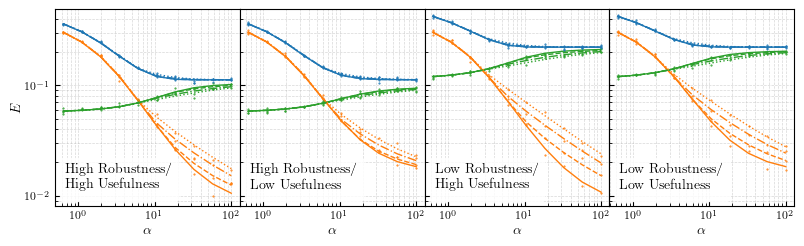

In [254]:
IMG_DIRECTORY = "./Assets/feature_combination_sweeps"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False) -> None:
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


plt.style.use("latex_ready.mplstyle")

multiplier = 1.25
width = multiplier * 487.8225
tuple_size = set_size(width, subplots=(1,2))
tuple_size = (8.5,2.4)


second_multiplier = 0.7


fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    sharex=True,
    sharey=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.12)
fig.subplots_adjust(bottom=0.08)
fig.subplots_adjust(top=0.9)
fig.subplots_adjust(right=0.99)
# plt.subplots_adjust(bottom=0.20)

# log the figure size
print("Figure size: ", fig.get_size_inches())




axes = axes.flatten()

# Create a custom legend
legend_elements = [Line2D([0], [0], color='blue', label='Line 1'),
                   Line2D([0], [0], color='orange', label='Line 2')]
custom_legend = []




for dm_idx, data_model_name in enumerate(data_models):

    axs = axes[dm_idx]


    linestyles = ["solid", "dashed", "dashdot", "dotted"]


    for idx, epsilon in enumerate(epsilons):

        print("Epsilon: ", epsilon)


        df_filtered = df.filter(pl.col("data_model_name") == data_model_name, pl.col("epsilon") == epsilon)
        df_filtered = df_filtered.sort(by="alpha")


        adversarial_error = df_filtered["adversarial_generalization_errors"]
        generalization_error = df_filtered["generalization_error"]
        boundary_error = adversarial_error - generalization_error

        adversarial_error_erm = df_filtered["adversarial_generalization_errors_erm"]
        generalization_error_erm = df_filtered["generalization_error_erm"]
        boundary_error_erm = adversarial_error_erm - generalization_error_erm

        rho = df_filtered["ρ"][0]
        tau = df_filtered["tau"][0]

        adversarial_error_erm_std = df_filtered["adversarial_generalization_errors_std_erm"]
        generalization_error_erm_std = df_filtered["generalization_error_erm_std"]
        boundary_error_erm_std = adversarial_error_erm_std - generalization_error_erm_std

        if dm_idx == 0:
            custom_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{adv}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{gen}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C2", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{bound}}}}, \varepsilon_t={}$".format(epsilon)))
            custom_legend.append(Line2D([0],[0],color="C3", linestyle=linestyles[idx], label=r"$E_{{\mathrm{{CP}}}}, \varepsilon_t={}$".format(epsilon)))
        


        adversarial_lines = axs.plot(alphas, adversarial_error, linestyle=linestyles[idx],color="C0")
        axs.plot(alphas, generalization_error, linestyle=linestyles[idx],color="C1")        
        axs.plot(alphas, boundary_error,linestyle=linestyles[idx], color="C2")
        

        def integrand(xi):
            return erfc(-np.sqrt(rho)/tau * xi * (1/np.sqrt(2))) * np.exp(-xi**2 / 2) / np.sqrt(2*np.pi)
        
        psi_i = 0.5
        if dm_idx > 1:
            psi_i = 2

        axs.errorbar(
            alphas,
            adversarial_error_erm,
            yerr=adversarial_error_erm_std,
            fmt=".",
            markersize=1,
            color="C0"
        )
        axs.errorbar(
            alphas,
            generalization_error_erm,
            yerr=generalization_error_erm_std,
            fmt=".",
            markersize=1,
            color="C1"
        )
        axs.errorbar(
            alphas,
            boundary_error_erm,
            yerr=boundary_error_erm_std,
            fmt=".",
            markersize=1,
            color="C2"
        )


    axs.set_xscale("log")
    axs.set_yscale("log")


    if dm_idx  == 0:
        axs.set_ylabel(r"$E$", labelpad=2.0)


    axs.set_xlabel(r"$\alpha$", labelpad=2.0)
    axs.grid(which="both", axis="both", alpha=0.5)
    axs.legend(title=map_data_model_name[data_model_name].replace("/","/\n"), loc="lower left")

    # Set the major ticks to face inwards
    axs.tick_params(axis='both', which='major', direction='in')

    # Set the minor ticks to face inwards
    axs.tick_params(axis='both', which='minor', direction='in')

    axs.set_ylim([8e-3, 4.9e-1])


error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = []

# mix the two legends
for idx in range(len(error_legend)):
    custom_legend.append(error_legend[idx])
    custom_legend.append(epsilon_legend[idx])

# # Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=4)

save = True
if save:
    save_plot(
        fig,
        "feature_combinations_alpha_sweep",
    )

plt.show()

Figure size:  [0.85 1.32]


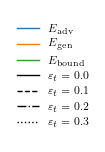

In [255]:
error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
# error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))


epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = error_legend + epsilon_legend

# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 0.1 * tuple_size[0],0.55 *tuple_size[1]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off') # Turn off the axes for the legend figure

# print figsize
print("Figure size: ", figlegend.get_size_inches())

figlegend.legend(
    handles=custom_legend,
    handlelength=2,
    loc="center",
    ncol=1,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "legend.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()

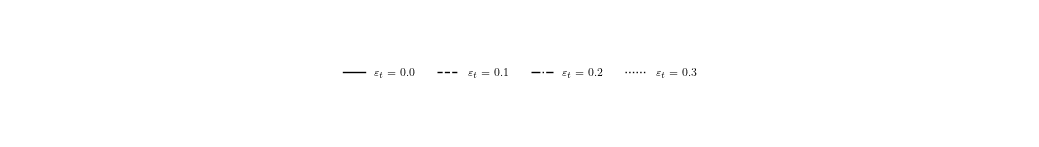

In [256]:
# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 1.2 * tuple_size[0],0.15 * tuple_size[0]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

figlegend.legend(
    handles=epsilon_legend,
    handlelength=2,
    loc="center",
    ncol=5,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "feature_combinations_alpha_sweep_legend_epsilon.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()